In [ ]:
#Exercise 1

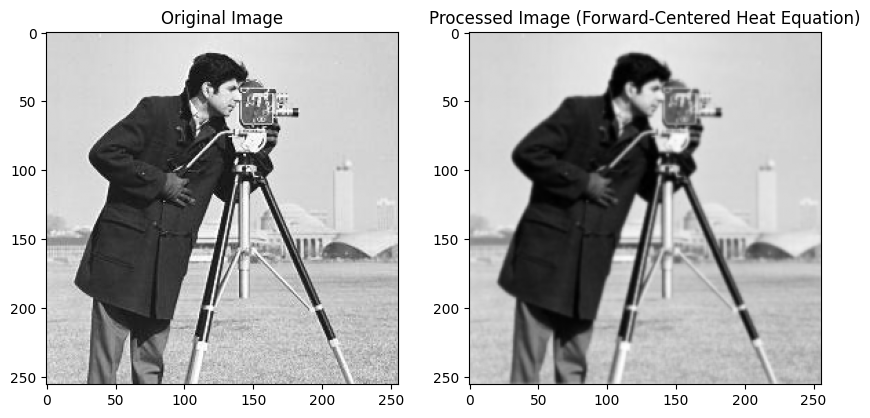

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def heat_equation_forward_centered(image, iterations, alpha, dt):

    # Convert the image to float for numerical computations
    image = image.astype(float)
    processed_image = image.copy()

    # Check CFL condition for stability
    if dt > 1 / (4 * alpha):
        raise ValueError("Time step dt violates CFL condition for stability.")

    for _ in range(iterations):
        # Compute the discrete Laplacian using forward-centered differences
        laplacian = (
            np.roll(processed_image, -1, axis=0) +  # North neighbor
            np.roll(processed_image, 1, axis=0) +   # South neighbor
            np.roll(processed_image, -1, axis=1) +  # East neighbor
            np.roll(processed_image, 1, axis=1) -   # West neighbor
            4 * processed_image                     # Central value
        )
        # Update the image using the heat equation
        processed_image += alpha * dt * laplacian

    return processed_image


# Esempio di utilizzo
if __name__ == "__main__":
    # Load the grayscale image (assuming the image is a grayscale file)
    image = plt.imread("cameraman.jpg")
    if image.ndim == 3:  # Convert RGB to grayscale if needed
        image = np.mean(image, axis=2)

    # Parameters
    iterations = 50  # Number of time iterations
    alpha = 0.1      # Thermal diffusivity coefficient
    dt = 0.1         # Time step (must satisfy CFL condition)

    # Apply the heat equation using forward-centered scheme
    processed_image = heat_equation_forward_centered(image, iterations, alpha, dt)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Processed Image (Forward-Centered Heat Equation)")
    plt.imshow(processed_image, cmap='gray')
    plt.show()


In [ ]:
#Exercise 2

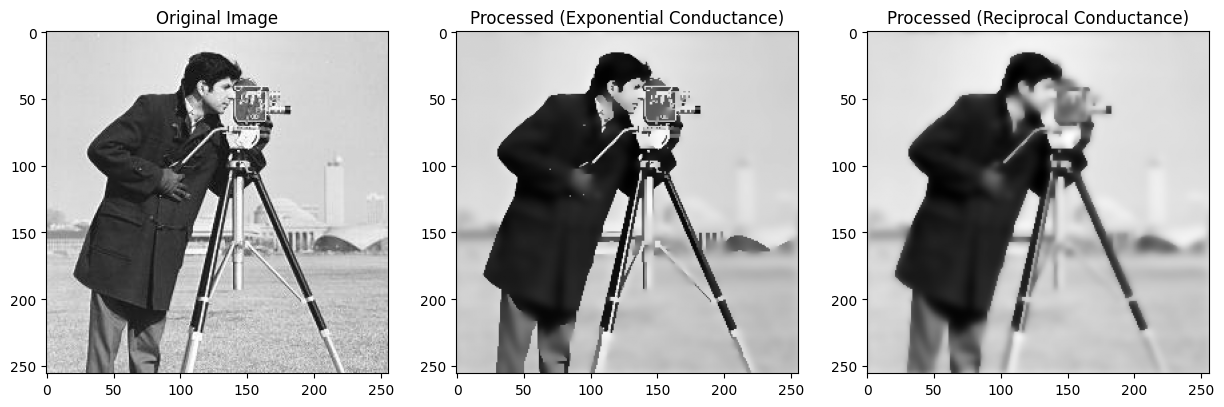

In [17]:
def perona_malik_diffusion(image, iterations, timestep, conductance_threshold, g_function="exp"):
    # Convert image to float for numerical stability
    image = image.astype(float)
    processed_image = image.copy()

    for _ in range(iterations):
        # Calculate gradients in four directions
        north = np.roll(processed_image, -1, axis=0) - processed_image
        south = np.roll(processed_image, 1, axis=0) - processed_image
        east = np.roll(processed_image, -1, axis=1) - processed_image
        west = np.roll(processed_image, 1, axis=1) - processed_image

        # Compute conductance based on the chosen function
        if g_function == "exp":
            c_north = np.exp(-(north / conductance_threshold) ** 2)
            c_south = np.exp(-(south / conductance_threshold) ** 2)
            c_east = np.exp(-(east / conductance_threshold) ** 2)
            c_west = np.exp(-(west / conductance_threshold) ** 2)
        elif g_function == "reciprocal":
            c_north = 1 / (1 + (north / conductance_threshold) ** 2)
            c_south = 1 / (1 + (south / conductance_threshold) ** 2)
            c_east = 1 / (1 + (east / conductance_threshold) ** 2)
            c_west = 1 / (1 + (west / conductance_threshold) ** 2)
        else:
            raise ValueError("Invalid conductance function. Choose 'exp' or 'reciprocal'.")

        # Update the image using the discretized Perona-Malik equation
        processed_image += timestep * (
            c_north * north +
            c_south * south +
            c_east * east +
            c_west * west
        )

    return processed_image


# Example Usage
if __name__ == "__main__":
    # Load the grayscale image
    image = plt.imread("cameraman.jpg")
    if image.ndim == 3:  # Convert to grayscale if RGB
        image = np.mean(image, axis=2)

    # Diffusion parameters
    iterations = 50
    timestep = 0.1
    conductance_threshold = 30

    # Apply Perona-Malik diffusion with both conductance functions
    processed_image_exp = perona_malik_diffusion(image, iterations, timestep, conductance_threshold, g_function="exp")
    processed_image_reciprocal = perona_malik_diffusion(image, iterations, timestep, conductance_threshold, g_function="reciprocal")

    # Plot the original and processed images
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("Processed (Exponential Conductance)")
    plt.imshow(processed_image_exp, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Processed (Reciprocal Conductance)")
    plt.imshow(processed_image_reciprocal, cmap='gray')
    plt.show()


In [ ]:
#Exercise 3

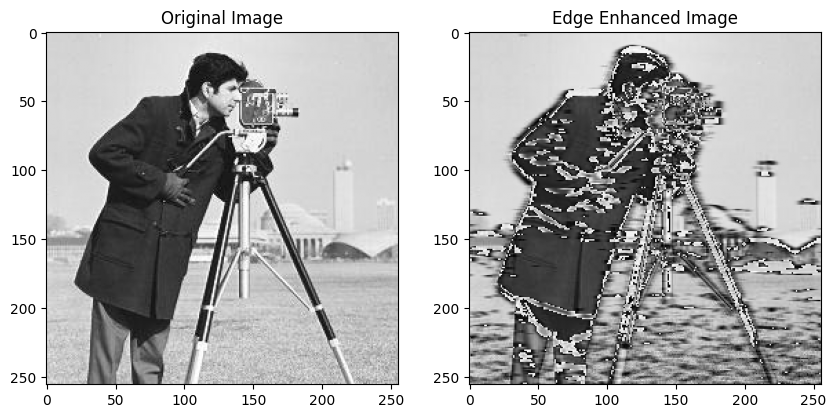

In [ ]:
from scipy.ndimage import gaussian_filter

In [ ]:
#Exercise 4

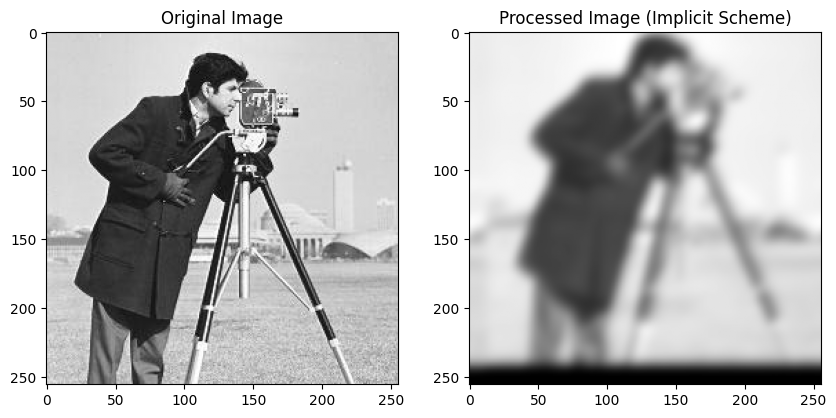

In [ ]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def heat_equation_implicit(image, alpha, time_steps):
    """
    Implements the 2-D Heat Equation using an implicit scheme (Backward Time, Centered Space).

    Parameters:
        image: 2D numpy array (grayscale image).
        alpha: Thermal diffusivity constant.
        time_steps: Number of iterations to apply the scheme.

    Returns:
        2D numpy array: Processed image after applying the implicit scheme.
    """
    image = image.astype(float)  # Ensure the image is float
    rows, cols = image.shape
    n = rows * cols  # Total number of pixels
    result = image.flatten()  # Flatten the image into a 1D array

    # Create the sparse matrix A for the implicit scheme
    diagonals = [
        (1 + 4 * alpha) * np.ones(n),  # Main diagonal
        -alpha * np.ones(n - 1),       # Off-diagonals (left and right)
        -alpha * np.ones(n - cols),    # Off-diagonals (top and bottom)
    ]
    offsets = [0, -1, cols]  # Main diagonal, left/right, top/bottom
    A = diags(diagonals, offsets, shape=(n, n)).tocsc()

    # Iterate for the given number of time steps
    for t in range(time_steps):
        result = spsolve(A, result)  # Solve the linear system

    return result.reshape((rows, cols))  # Reshape back to 2D

# Test the function
processed_image_implicit = heat_equation_implicit(original_image, alpha=0.7, time_steps=50)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Processed Image (Implicit Scheme)")
plt.imshow(processed_image_implicit, cmap='gray')
plt.show()
